### PCA from Youtube
```
https://www.youtube.com/watch?v=Lsue2gEM9D0
https://statquest.org/2018/01/08/statquest-pca-in-python/
```

```
File Name: PCA_v2
Date: 5-Jul-2018
Version: v2
Description: Copied from original PCA code, modify to test with your music data
```

In [219]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

```
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
```

In [220]:
genes = [ 'gene' + str(i) for i in range(1,101)]

In [221]:
# genes

In [222]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [223]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [224]:
# data.index

In [225]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,100), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,100), size=5)

In [226]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1   34   32   39   50   45   28   31   41   31   22
gene2   43   50   54   28   37   73   56   64   62   67
gene3   19   24    9   14   14   31   33   27   35   18
gene4   58   67   53   67   70   76   94   80  113   97
gene5   42   43   38   39   43   15   25   15   32   20


In [227]:
print(data.shape)

(100, 10)


In [228]:
type(data)

pandas.core.frame.DataFrame

## Override this data with music data

In [229]:
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3"
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [230]:
data = df.drop('label',axis=1)

In [231]:
data.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575',
       'f576'],
      dtype='object', length=577)

```
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
```

In [232]:
# scaled_data = preprocessing.scale(data.T)
scaled_data = preprocessing.scale(data)

In [233]:
pca = PCA()

In [234]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [235]:
pca_data = pca.transform(scaled_data)

In [236]:
pca_data.shape

(206665, 577)

```
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
```

```
#The following code constructs the Scree plot
```

In [237]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [238]:
len(per_var)

577

In [239]:
per_var

array([37.9,  4.2,  3.8,  1.6,  1.6,  1.5,  1.4,  1.4,  1.2,  1. ,  1. ,
        0.9,  0.9,  0.9,  0.8,  0.8,  0.8,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0

In [240]:
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

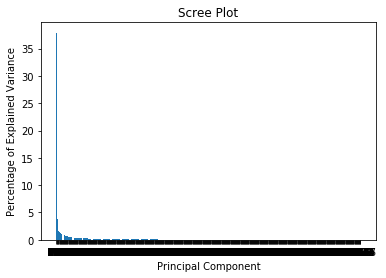

In [241]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

```
#the following code makes a fancy looking plot using PC1
```

In [242]:
# pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df = pd.DataFrame(pca_data, columns=data.columns)

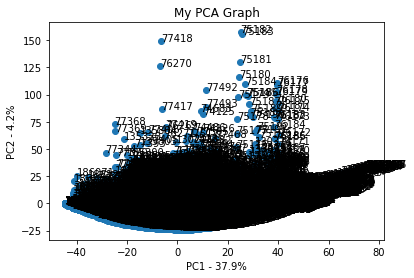

In [243]:
plt.scatter(pca_df.f0, pca_df.f1)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.f0.loc[sample], pca_df.f1.loc[sample]))
    
plt.show()

In [245]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0]) # , index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 20 genes
top_10_genes = sorted_loading_scores[0:20].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])
# <span_id="mce_SELREST_start", style="overflow:hidden;line-height:0;"></span>)

415    0.061801
347    0.060763
346    0.060634
416    0.060278
444    0.060071
356    0.059834
390    0.059671
383    0.059643
410    0.059601
414    0.059437
454    0.059353
405    0.059040
391    0.058955
453    0.058803
480    0.058739
337    0.058674
384    0.058584
443    0.058543
336    0.058541
381    0.058524
dtype: float64
